# Vehicle Insurance Sales Prediction
Derek Shi, Grace Wei, Kevin Tuyishime

## Exploratory Data Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# import train and test dataset 
testurl = 'https://raw.githubusercontent.com/graceewei/cs334Project/main/test.csv'
trainurl = 'https://raw.githubusercontent.com/graceewei/cs334Project/main/train.csv'

train = pd.read_csv(trainurl)
test = pd.read_csv(testurl)

### Our data

In [ ]:
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,Male,74,1,26.0,1,1-2 Year,No,30170.0,26.0,88,0
381105,381106,Male,30,1,37.0,1,< 1 Year,No,40016.0,152.0,131,0
381106,381107,Male,21,1,30.0,1,< 1 Year,No,35118.0,160.0,161,0
381107,381108,Female,68,1,14.0,0,> 2 Years,Yes,44617.0,124.0,74,0


### Splitting feature variables and the target variable

In [ ]:
# separate feature variables and target variable in train dataset 
x = train.iloc[:,:-1]
y = pd.DataFrame(train['Response'])

####  Visualize  the classes

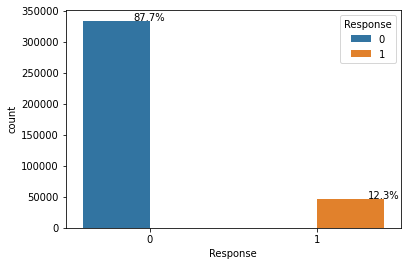

In [ ]:
total = float(len(train))
ax =sns.countplot(data=train,hue='Response',x='Response')
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [ ]:
x.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
dtype: object

### Check for duplicate rows

In [ ]:
# Check for duplicate rows 
duplicate_rows_x = x[x.duplicated()]
print("number of duplicate rows: ", duplicate_rows_x.shape)


number of duplicate rows:  (0, 11)


There is no duplicated rows.

### Check for NULL values

In [ ]:
# check for null values
print(x.isnull().sum())

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


There is no null values.

### General Overview of the data

In [ ]:
data_overview = x.columns.tolist()
data_overview.remove('id')
x[data_overview].describe(percentiles=[.25,.50,.75,.95])

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000
95%,69.000000,1.000000,47.000000,1.000000,55176.000000,160.000000,285.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000


#### Distribution of `id`

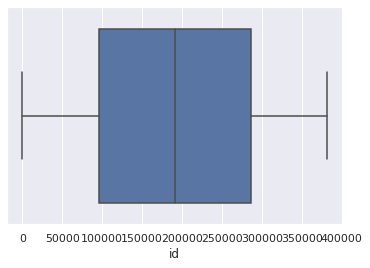

In [ ]:
sns.set(color_codes=True)
sns.boxplot(x=x['id'])

#### Distribution of `Age`

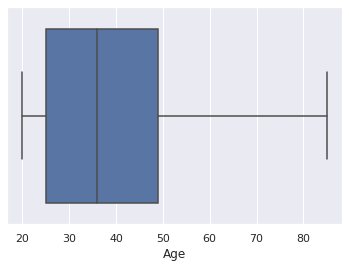

In [ ]:
sns.boxplot(x=x['Age'])

#### Distribution of `Vehicle_Age`

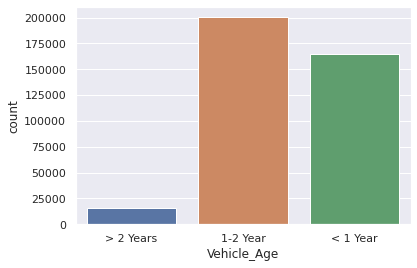

In [ ]:
sns.countplot(x="Vehicle_Age", data=x)

#### Distribution of `Annual_Premium`

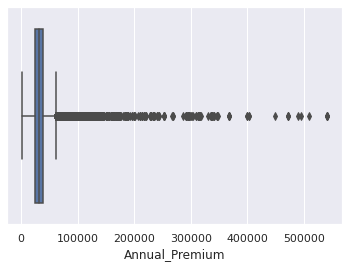

In [ ]:
sns.boxplot(x=x['Annual_Premium'])

#### Distribution of `Policy_Sales_Channel`

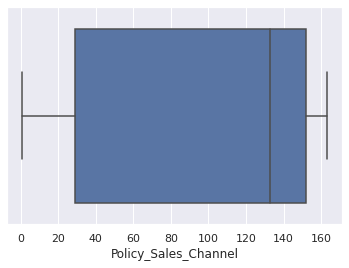

In [ ]:
sns.boxplot(x=x['Policy_Sales_Channel'])

#### Distribution of `Vintage`

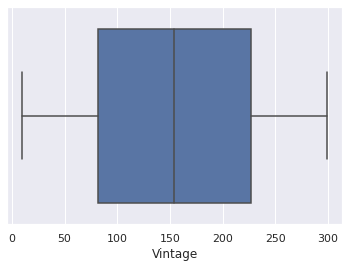

In [ ]:
sns.boxplot(x=x['Vintage'])

#### Heatmap for correlation

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.001561,-0.000564,-0.000572,0.002457,0.003027,-0.002837,-0.000630,-0.001368
Age,0.001561,1.000000,-0.079782,0.042574,-0.254682,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.079782,1.000000,-0.001081,0.014969,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.042574,-0.001081,1.000000,-0.024659,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.254682,0.014969,-0.024659,1.000000,0.004269,0.219381,0.002537,-0.341170
Annual_Premium,0.003027,0.067507,-0.011906,-0.010588,0.004269,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.577826,0.043731,-0.042420,0.219381,-0.113247,1.000000,0.000002,-0.139042
Vintage,-0.000630,-0.001264,-0.000848,-0.002750,0.002537,-0.000608,0.000002,1.000000,-0.001050
Response,-0.001368,0.111147,0.010155,0.010570,-0.341170,0.022575,-0.139042,-0.001050,1.000000


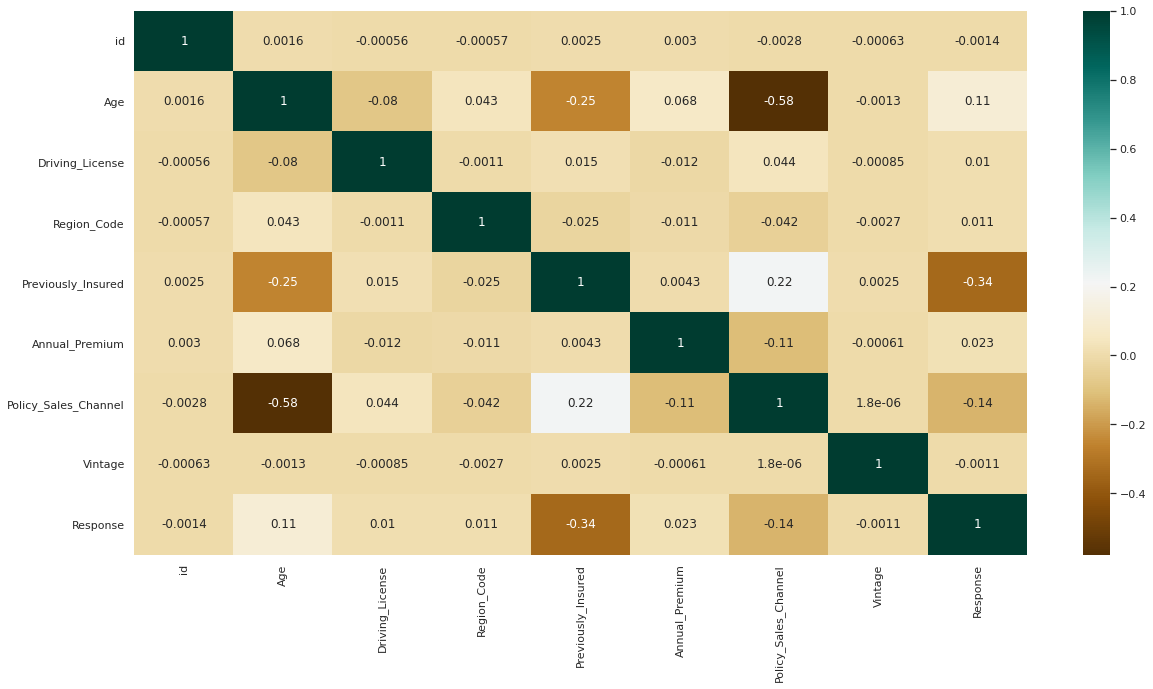

In [ ]:
plt.figure(figsize=(20,10))
c= train.corr()
sns.heatmap(c,cmap='BrBG',annot=True)
c

#### Response variable distribution

In [ ]:
y['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

## Feature Preprocessing

### Convert columns with text values

In [ ]:
x.loc[x['Gender'] == 'Male', 'Gender'] = 1
x.loc[x['Gender'] == 'Female', 'Gender'] = 0

x.loc[x['Vehicle_Age'] == '> 2 Years', 'Vehicle_Age'] = 2
x.loc[x['Vehicle_Age'] == '1-2 Year', 'Vehicle_Age'] = 1
x.loc[x['Vehicle_Age'] == '< 1 Year', 'Vehicle_Age'] = 0

x.loc[x['Vehicle_Damage'] == 'Yes', 'Vehicle_Damage'] = 1
x.loc[x['Vehicle_Damage'] == 'No', 'Vehicle_Damage'] = 0

### Change all variable types to int32


In [ ]:
for col in x.columns:
    x[col] = x[col].astype(np.int32)

x.dtypes

id                      int32
Gender                  int32
Age                     int32
Driving_License         int32
Region_Code             int32
Previously_Insured      int32
Vehicle_Age             int32
Vehicle_Damage          int32
Annual_Premium          int32
Policy_Sales_Channel    int32
Vintage                 int32
dtype: object

### Checking for Quasi-Constant

In [ ]:
dataset = x
quasi_constants=VarianceThreshold(threshold=0.01)
quasi_constants.fit(dataset)
len(dataset.columns[quasi_constants.get_support()])
qconstant_columns = [column for column in dataset.columns
                    if column not in dataset.columns[quasi_constants.get_support()]]

for column in qconstant_columns:
    print(column)

Driving_License


### Drop features

In [ ]:
x.drop(columns=['id','Vintage','Driving_License'],inplace=True)

### Upsampling Minority Classes

Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal. Upsampling with replacement

In [ ]:
df = pd.concat([x,y],axis=1)

from sklearn.utils import resample,shuffle
df_majority = df[df['Response']==0]
df_minority = df[df['Response']==1]
df_minority_upsampled = resample(df_minority,replace=True,n_samples=334399,random_state = 123)
balanced_df = pd.concat([df_minority_upsampled,df_majority])
balanced_df = shuffle(balanced_df)
balanced_df.Response.value_counts()

1    334399
0    334399
Name: Response, dtype: int64

In [ ]:
# New X and y 
x_balanced = balanced_df.iloc[:,:-1]
y_balanced = pd.DataFrame(balanced_df['Response'])

## Models
- In this section, we tests various modles: Decisoin Tree, KNN Classifier, Logistic Regression, LightGBM, and Random Forest

### Decision Tree

#### Parameter Tuning with unbalanced classification

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(x, y, test_size=0.2, random_state=42)

# find the best parameters 
parameters = {'max_depth':range(2,10),'criterion':('gini', 'entropy'), 'splitter':('best','random')}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, scoring='f1')
clf.fit(X=X_train_dt, y=y_train_dt) #train on X_train and y_train
tree_model = clf.best_estimator_
print ("best score: ", clf.best_score_, "best parameter: ", clf.best_params_) 


best score:  0.008502947822756382 best parameter:  {'criterion': 'gini', 'max_depth': 9, 'splitter': 'best'}


Best max depth is 9, best criterion is `gini`, and best splitter is `best`. With a f1 score of 0.0086

#### Train and predict data with unbalanced classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 9, splitter = 'best')
dt = dt.fit(X_train_dt, y_train_dt)

# predict on x_test
y_pred_dt = dt.predict(X_test_dt)

#### Parameter tuning with balanced classification 

In [ ]:
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn import metrics

# holdout + k-fold cv
X_train_dt_balanced, X_test_dt_balanced, y_train_dt_balanced, y_test_dt_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

# find the best parameters 
parameters = {'max_depth':range(2,10),'criterion':('gini', 'entropy'), 'splitter':('best','random')}
clf = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4, scoring='f1')
clf.fit(X=X_train_dt_balanced, y=y_train_dt_balanced) #train on X_train and y_train
tree_model = clf.best_estimator_
print ("best score: ", clf.best_score_, "best parameter: ", clf.best_params_) 


best score:  0.822874946174404 best parameter:  {'criterion': 'gini', 'max_depth': 7, 'splitter': 'best'}


#### Training and Predicting with balanced classification 

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_balanced = DecisionTreeClassifier(random_state=0, criterion = 'gini', max_depth = 7, splitter = 'best')
dt_balanced = dt_balanced.fit(X_train_dt_balanced, y_train_dt_balanced)

# predict on x_test
y_pred_dt_balanced = dt_balanced.predict(X_test_dt_balanced)


### KNN Classifier

#### Parameter Tunning on the unbalanced dataset


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,classification_report
from sklearn.model_selection import GridSearchCV
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(x, y, test_size=0.2, random_state=42)

knn_params =  {'n_neighbors':list(range(5,25)), 'weights':['distance'], 'metric':['euclidean','manhattan']}
p_knn=GridSearchCV(KNeighborsClassifier(n_jobs=1),knn_params,cv = 5, scoring = "f1", verbose=True, n_jobs=-1)
p_knn.fit(X_train_knn, y_train_knn.values.ravel()) 
knn_s=p_knn.best_estimator_
print ("best score: ", p_knn.best_score_, "best parameter: ", p_knn.best_params_) 
# best score:  0.16569002606384056 best parameter:  {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}

Accuracy score 0.8563406890399098


#### Applying the  best  params on  unbalanced dataset

In [ ]:
b_model =KNeighborsClassifier(n_neighbors=15,weights='distance',metric='manhattan',n_jobs=-1)
b_model.fit(X_train_knn, y_train_knn.values.ravel())
y_pred_knn_unbal =b_model.predict(X_test_knn)

#### Parameter tuning for the balanced dataset

In [ ]:
X_train_bal_knn, X_test_bal_knn, y_train_bal_knn, y_test_bal_knn = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

knn_bal_params =  {'n_neighbors':list(range(5,25)), 'weights':['distance'], 'metric':['euclidean','manhattan']}
p_knn_bal=GridSearchCV(KNeighborsClassifier(),knn_bal_params,scoring = "f1",cv = 5, verbose=True, n_jobs=-1)
p_knn_bal.fit(X_train_bal_knn, y_train_bal_knn.values.ravel()) 
print ("best score: ", p_knn_bal.best_score_, "best parameter: ", p_knn_bal.best_params_) 

Accuracy score 0.8257999401913876


#### Applying the best params on the  balanced dataset

In [ ]:
b_model =KNeighborsClassifier(n_neighbors=15,weights='distance',metric='manhattan',n_jobs=-1)
b_model.fit(X_train_bal_knn, y_train_bal_knn.values.ravel())
y_pred_knn_bal = knn.predict(X_test_bal_knn)

### Logistic Regression

#### Train data

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
X_train_logi_balanced, X_test_logi_balanced, y_train_logi_balanced, y_test_logi_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

param_logi = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
    
logi = GridSearchCV(LogisticRegression(), param_grid = param_logi, scoring = "f1", cv = 5, verbose=True, n_jobs=-1)
logi.fit(X_train_logi_balanced, y_train_logi_balanced)
logi_model = logi.best_estimator_
print ("best score: ", logi.best_score_, "best parameter: ", logi.best_params_) 

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:  1.7min finished
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


best score:  0.709734185988337 best parameter:  {'C': 0.001, 'penalty': 'l2'}


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


#### Predict Test Data

In [ ]:
from sklearn.linear_model import LogisticRegression
logi_balanced = LogisticRegression(random_state=0, penalty = 'l2', C = 0.01)
logi_balanced = logi_balanced.fit(X_train_logi_balanced, y_train_logi_balanced)

# predict on x_test
y_pred_logi_balanced = logi_balanced.predict(X_test_logi_balanced)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


### LightGBM

#### Parameter Tuning with unnormalized data 

https://lightgbm.readthedocs.io/en/latest/Parameters-Tuning.html

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
import numpy as np

# train_test_split
X_train_LGBM, X_test_LGBM, y_train_LGBM, y_test_LGBM = train_test_split(x, y, test_size=0.2, random_state=42)


model_LGBM = LGBMClassifier(random_state = 22)



param_grid = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "bagging_fraction" : np.arange(0.5,0.8,0.01),
              "bagging_frequency": range(5,10),
              "min_data_in_leaf" : range(100,1000,50),
              "num_leaves"       : range(50,1000,10),
              "n_estimators"     : range(100,600)
              }
'''   
param_grid = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "gamma"            : np.arange(0.01,1, 0.03),
              "n_estimators"     : range(100,500),
              "scale_pos_weight" : range(1,20)
              }
'''
                        
kfold = KFold(n_splits = 6, shuffle = True, random_state = 22)

grid_search = RandomizedSearchCV(model_LGBM, param_distributions = param_grid, scoring = "f1", n_jobs  = -1, cv = kfold, verbose = 1)
grid_result = grid_search.fit(X_train_LGBM, y_train_LGBM)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  9.1min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.3min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.207523 using {'num_leaves': 150, 'n_estimators': 573, 'min_data_in_leaf': 550, 'max_depth': 11, 'learning_rate': 0.85, 'bagging_frequency': 8, 'bagging_fraction': 0.6100000000000001}


#### Train and predict data with unnoramlized data 

In [ ]:
# Predict using the best parameters 
bestLGBM = LGBMClassifier(num_leaves = 940, n_estimators = 513, min_data_in_leaf=200, max_depth=13, learning_rate = 0.46, bagging_frequency = 9, bagging_fraction = 0.55)
bestLGBM.fit(X_train_LGBM, y_train_LGBM)
y_pred_LGBM = bestLGBM.predict(X_test_LGBM)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Parameter Tuning with normalized data 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
import numpy as np

X_train_LGBM_norm, X_test_LGBM_norm, y_train_LGBM_norm, y_test_LGBM_norm = train_test_split(normalized_x, y, test_size=0.2, random_state=42)


model_LGBM_norm = LGBMClassifier(random_state = 22)

param_grid_norm = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "bagging_fraction" : np.arange(0.5,0.8,0.01),
              "bagging_frequency": range(5,10),
              "min_data_in_leaf" : range(100,1000,50),
              "num_leaves"       : range(50,1000,10),
              "n_estimators"     : range(100,600)
              }
kfold_norm = KFold(n_splits = 6, shuffle = True, random_state = 22)

grid_search_norm = RandomizedSearchCV(model_LGBM_norm, param_distributions = param_grid_norm, scoring = "f1", n_jobs  = -1, cv = kfold_norm, verbose = 1)
grid_result_norm = grid_search_norm.fit(X_train_LGBM_norm, y_train_LGBM_norm)
print("Best: %f using %s" % (grid_result_norm.best_score_, grid_result.best_params_))

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  8.9min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.176912 using {'num_leaves': 150, 'n_estimators': 573, 'min_data_in_leaf': 550, 'max_depth': 11, 'learning_rate': 0.85, 'bagging_frequency': 8, 'bagging_fraction': 0.6100000000000001}


#### Train and Predict data with normalized data

In [ ]:
# Predict using the best parameters 
bestLGBM_norm = LGBMClassifier(num_leaves = 940, n_estimators = 513, min_data_in_leaf=200, max_depth=13, learning_rate = 0.46, bagging_frequency = 9, bagging_fraction = 0.55)
bestLGBM_norm.fit(X_train_LGBM_norm, y_train_LGBM_norm)
y_pred_LGBM_norm = bestLGBM_norm.predict(X_test_LGBM_norm)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Parameter Tuning with unnormalized data and balanced classification 

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
import numpy as np

# train_test_split
X_train_LGBM_balanced, X_test_LGBM_balanced, y_train_LGBM_balanced, y_test_LGBM_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)


model_LGBM_balanced = LGBMClassifier(random_state = 22)

param_grid_balanced = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "bagging_fraction" : np.arange(0.5,0.8,0.01),
              "bagging_frequency": range(5,10),
              "min_data_in_leaf" : range(100,1000,50),
              "num_leaves"       : range(50,1000,10),
              "n_estimators"     : range(100,600)
              }
              
kfold_balanced = KFold(n_splits = 6, shuffle = True, random_state = 22)

grid_search_balanced = RandomizedSearchCV(model_LGBM_balanced, param_distributions = param_grid_balanced, scoring = "f1", n_jobs  = -1, cv = kfold_balanced, verbose = 1)
grid_result_balanced = grid_search_balanced.fit(X_train_LGBM_balanced, y_train_LGBM_balanced)
print("Best: %f using %s" % (grid_result_balanced.best_score_, grid_result_balanced.best_params_))

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 14.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.876523 using {'num_leaves': 980, 'n_estimators': 142, 'min_data_in_leaf': 100, 'max_depth': 18, 'learning_rate': 0.33999999999999997, 'bagging_frequency': 5, 'bagging_fraction': 0.51}


#### Train and Predict unnormalized data with balanced classification

In [ ]:
# Predict using the best parameters 
bestLGBM_balanced = LGBMClassifier(num_leaves = 210, n_estimators = 328, min_data_in_leaf=300, max_depth=15, learning_rate = 0.67, bagging_frequency = 8, bagging_fraction = 0.69)
bestLGBM_balanced.fit(X_train_LGBM_balanced, y_train_LGBM_balanced)
y_pred_LGBM_balanced = bestLGBM_balanced.predict(X_test_LGBM_balanced)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### XGBoost

#### Parameter Tuning with original data and balanced classificat

In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
import numpy as np

# train_test_split
X_train_XGB_balanced, X_test_XGB_balanced, y_train_XGB_balanced, y_test_XGB_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

model_XGB_balanced = XGBClassifier(random_state = 22)

param_grid_XGB_balanced = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "gamma"            : np.arange(0.01,1, 0.03),
              "subsample"        : np.arange(0.5,1,0.1), 
              "colsample_bytree" : np.arange(0.5,1,0.1),
              "min_child_weight" : range(1,10)
              }

'''
param_grid_XGB_balanced = {"learning_rate"    : np.arange(0.01, 1, 0.03),
              "max_depth"        : range(2,20),
              "gamma"            : np.arange(0.01,1, 0.03),
              "n_estimators"     : range(100,500),
              "subsample"        : np.arange(0.5,1,0.1), 
              "colsample_bytree" : np.arange(0.5,1,0.1),
              "min_child_weight" : range(1,10), 
              }

'''
kfold_XGB_balanced = KFold(n_splits = 3, shuffle = True, random_state = 22)

grid_search_XGB_balanced = RandomizedSearchCV(model_XGB_balanced, param_distributions = param_grid_XGB_balanced, scoring = "f1", n_jobs  = -1, cv = kfold_XGB_balanced, verbose = 1)
grid_result_XGB_balanced = grid_search_XGB_balanced.fit(X_train_XGB_balanced, y_train_XGB_balanced)
print("Best: %f using %s" % (grid_result_XGB_balanced.best_score_, grid_result_XGB_balanced.best_params_))


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 16.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best: 0.854874 using {'subsample': 0.6, 'min_child_weight': 3, 'max_depth': 12, 'learning_rate': 0.9099999999999999, 'gamma': 0.13, 'colsample_bytree': 0.7}


In [ ]:
# Predict using the best parameters 
bestXGB_balanced = XGBClassifier(subsample = 0.80, min_child_weight=4, max_depth=17, learning_rate = 0.67, gamma = 0.61, colsample_bytree = 0.8)
bestXGB_balanced.fit(X_train_XGB_balanced, y_train_XGB_balanced)
y_pred_XGB_balanced = bestXGB_balanced.predict(X_test_XGB_balanced)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### Random Forest

#### Parameter Tuning


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV, KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
X_train_rf_balanced, X_test_rf_balanced, y_train_rf_balanced, y_test_rf_balanced = train_test_split(x_balanced, y_balanced, test_size=0.2, random_state=42)

parameters = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [20, 40, 60, 80, 100, 120, 140, 160, 180, 200]}

kfold = KFold(n_splits = 6, shuffle = True, random_state = 22)
rfc = RandomizedSearchCV(RandomForestClassifier(), param_distributions = parameters, scoring = "f1", n_jobs  = -1, cv = kfold, verbose = 1)
rfc.fit(X=X_train_rf_balanced, y=y_train_rf_balanced) #train on X_train and y_train
forest_model = rfc.best_estimator_
print ("best score: ", rfc.best_score_, "best parameter: ", rfc.best_params_) 

Fitting 6 folds for each of 10 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KeyboardInterrupt: ignored

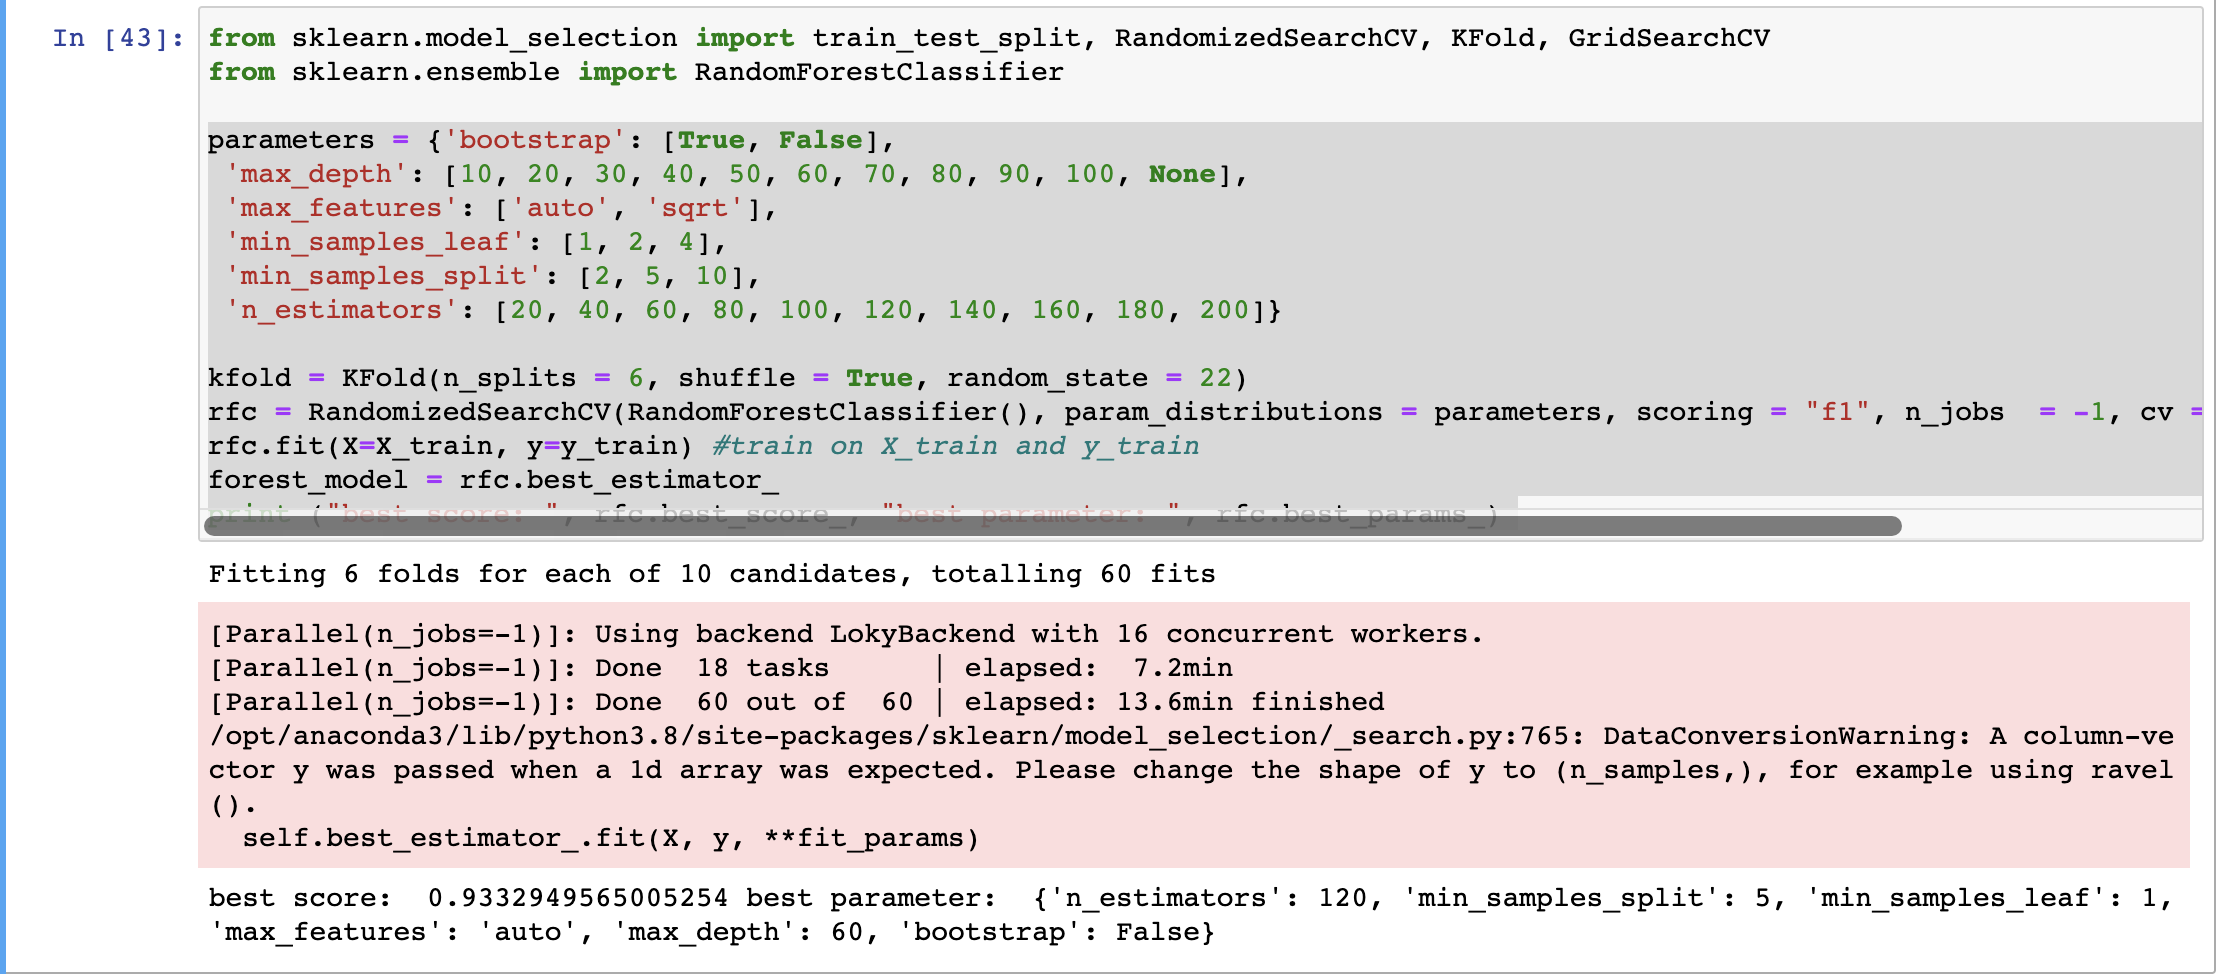

Due to unknown reasons, the code above cannot run in Google colab. The screenshot above is the result from Jupyter Notebook.

####Model Prediction



In [ ]:
best_rf = RandomForestClassifier(n_estimators = 120, min_samples_split= 5, min_samples_leaf= 1, max_features= 'auto', max_depth= 60, bootstrap= False)
best_rf = best_rf.fit(X_train_rf_balanced, y_train_rf_balanced)
y_pred_rf_balanced = best_rf.predict(X_test_rf_balanced)

## Model Assessment

For model assessment, we will be looking at three metrics: **accuracy score, f1 score, and ROC AUC score**

In [ ]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,classification_report

### Decision Tree



In [ ]:
print('Decision Tree accuracy: ', accuracy_score(y_test_dt, y_pred_dt))
print('Decision Tree f1_score: ', f1_score(y_test_dt, y_pred_dt))
print('Decision Tree ROC AUC score: ', roc_auc_score(y_test_dt, y_pred_dt))
print(classification_report (y_test_dt, y_pred_dt))

Decision Tree accuracy:  0.8747605678150665
Decision Tree f1_score:  0.004172751929897767
Decision Tree ROC AUC score:  0.5007277455942636


The accuracy score is 0.8750. 

A low F1 score is an indication of both poor precision and poor recall.

When the ROC AUC score is 0.5, it means model has no class separation capacity. 

In [ ]:
print('Decision Tree (balanced) accuracy: ', accuracy_score(y_test_dt_balanced, y_pred_dt_balanced))
print('Decision Tree (balanced) f1_score: ', f1_score(y_test_dt_balanced, y_pred_dt_balanced))
print('Decision Tree (balanced) ROC AUC score: ', roc_auc_score(y_test_dt_balanced, y_pred_dt_balanced))
print(classification_report(y_test_dt_balanced, y_pred_dt_balanced))

Decision Tree (balanced) accuracy:  0.7811453349282297
Decision Tree (balanced) f1_score:  0.8129743681480156
Decision Tree (balanced) ROC AUC score:  0.7812935115416342


### KNN Classifier

In [ ]:
print('KNN accuracy: ', accuracy_score(y_test_knn, y_pred_knn_unbal))
print('KNN f1_score: ', f1_score(y_test_knn, y_pred_knn_unbal))
print('KNN ROC AUC score: ', roc_auc_score(y_test_knn, y_pred_knn_unbal))
print(classification_report(y_test_knn, y_pred_knn_unbal))

KNN accuracy:  0.8563406890399098
KNN f1_score:  0.12034061696658098
KNN ROC AUC score:  0.5230137540596181


In [ ]:
print('KNN (balanced) accuracy: ', accuracy_score(y_test_bal_knn,  y_pred_knn_bal))
print('KNN (balanced) f1_score: ', f1_score(y_test_bal_knn, y_pred_knn_bal))
print('KNN (balanced) ROC AUC score: ', roc_auc_score(y_test_bal_knn, y_pred_knn_bal))
print(classification_report(y_test_bal_knn, y_pred_knn_bal))

KNN (balanced) accuracy:  0.8257999401913876
KNN (balanced) f1_score:  0.8464746694076021
KNN (balanced) ROC AUC score:  0.8259173475439204


### Logsitic Regression

In [ ]:
print('Logistic Regression accuracy: ', accuracy_score(y_test_logi_balanced, y_pred_logi_balanced))
print('Logistic Regression f1_score: ', f1_score(y_test_logi_balanced, y_pred_logi_balanced))
print('Logistic Regression ROC AUC score: ', roc_auc_score(y_test_logi_balanced, y_pred_logi_balanced))
print(classification_report(y_test_logi_balanced, y_pred_logi_balanced))

Logistic Regression accuracy:  0.77811004784689
Logistic Regression f1_score:  0.8086173766136624
Logistic Regression ROC AUC score:  0.7777564431796655


### LightGBM

In [ ]:
print('LightGBM using original data accuracy: ', accuracy_score(y_test_LGBM, y_pred_LGBM))
print('LightGBM using original data f1_score: ', f1_score(y_test_LGBM, y_pred_LGBM))
print('LightGBM using original data ROC_AUC score: ', roc_auc_score(y_test_LGBM, y_pred_LGBM))
print(classification_report(y_test_LGBM, y_pred_LGBM))

LightGBM using original data accuracy:  0.8583479835218178
LightGBM using original data f1_score:  0.2230697272792689
LightGBM using original data ROC_AUC score:  0.560212184783334


In [ ]:
print('LightGBM using normalized data accuracy: ', accuracy_score(y_test_LGBM_norm, y_pred_LGBM_norm))
print('LightGBM using normalized data f1_score: ', f1_score(y_test_LGBM_norm, y_pred_LGBM_norm))
print('LightGBM using normalized data ROC_AUC score: ', roc_auc_score(y_test_LGBM_norm, y_pred_LGBM_norm))
print(classification_report(y_test_LGBM_norm, y_pred_LGBM_norm))

LightGBM using normalized data accuracy:  0.85754768964341
LightGBM using normalized data f1_score:  0.21783604667915285
LightGBM using normalized data ROC_AUC score:  0.5580445988158622


In [ ]:
print('LightGBM using original data (balanced) accuracy: ', accuracy_score(y_test_LGBM_balanced, y_pred_LGBM_balanced))
print('LightGBM using original data (balanced) f1_score: ', f1_score(y_test_LGBM_balanced, y_pred_LGBM_balanced))
print('LightGBM using original data (balanced) ROC_AUC score: ', roc_auc_score(y_test_LGBM_balanced, y_pred_LGBM_balanced))
print(classification_report(y_test_LGBM_balanced, y_pred_LGBM_balanced))

LightGBM using original data (balanced) accuracy:  0.8692209928229665
LightGBM using original data (balanced) f1_score:  0.8811657212730547
LightGBM using original data (balanced) ROC_AUC score:  0.8693088164572365


### XGBoost

In [ ]:
print('XGBoost using original data (balanced) accuracy: ', accuracy_score(y_test_XGB_balanced, y_pred_XGB_balanced))
print('XGBoost using original data (balanced) f1_score: ', f1_score(y_test_XGB_balanced, y_pred_XGB_balanced))
print('XGBoost using original data (balanced) ROC_AUC score: ', roc_auc_score(y_test_XGB_balanced, y_pred_XGB_balanced))
print(classification_report(y_test_XGB_balanced, y_pred_XGB_balanced))

XGBoost using original data (balanced) accuracy:  0.884046052631579
XGBoost using original data (balanced) f1_score:  0.8932494562673787
XGBoost using original data (balanced) ROC_AUC score:  0.8841214845861979


### Random Forest

In [ ]:
print('Random Forest using balanced data accuracy: ', accuracy_score(y_test_rf_balanced, y_pred_rf_balanced))
print('Random Forest using balanced data f1_score: ', f1_score(y_test_rf_balanced, y_pred_rf_rf_balanced))
print('Random Forest using balanced data ROC_AUC score: ', roc_auc_score(y_test_rf_balanced, y_pred_rf_rf_balanced))
print(classification_report(y_test_rf_balanced, y_pred_rf_rf_balanced))

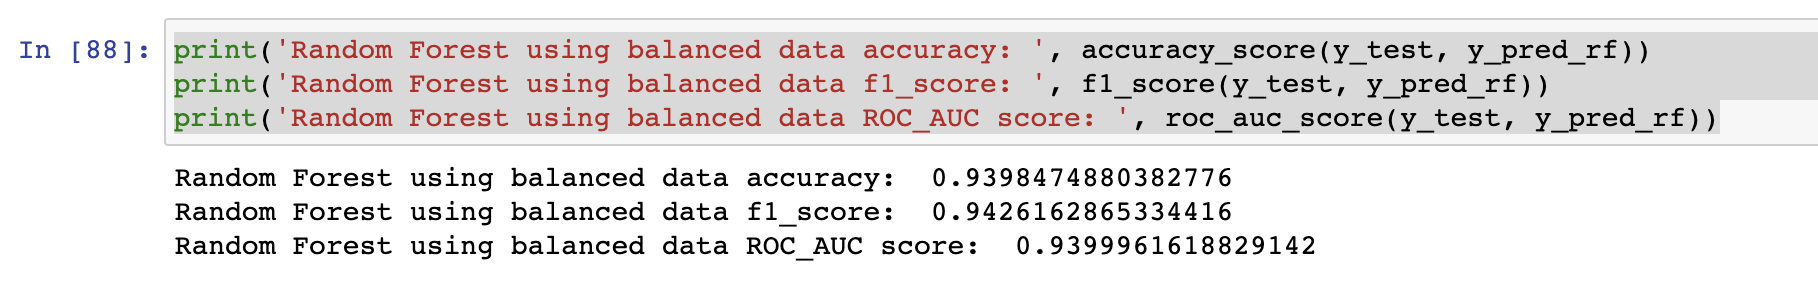

Due to unknown reasons, the Random Forest model cannot run on Google Colab. Thus, I took the screenshot from Jupyter Notebook as reference.